# Instrucciones

Gráfica por experimento:

LV(x,y,erry,unitx,unity,subtitle,plot2,save,savename)

 - x: Lista o numpy array de longitud de onda en nm
 - y: Lista o numpy array de voltaje en mV
 - erry: Incertidumbre porcentual **extra**
 - unitx: Unidades de salida del eje x, las opciones son 'nm','m','Hz' y "THz"
 - unity: Unidades de salida del eje y, las opciones son 'mV','V','J'
 - subtitle: Subtítulo de la gráfica
 - plot2: Gráfica extra sobre el mismo plano
 - save: Guarda la gráfica en formato PDF; Booleano, 1 o True para guardar, 0 o False para no guardar
 - savename: cadena, nombre del archivo para guardar


Gráfica promedio de los experimentos:

LV_prom(i,n,unittx,unitty,save,savename,plot2,subtitle,factor_x2)

- i: índice de la variable del experimento final
- n: índice de la variable del experimento final
- unittx: igual que unitx para LV
- unitty: igual que unity para LV
- save: igual que para LV
- savename: igual que para LV
- plot2: Booleano, coloca la dispersión de puntos de todos los experimentos junto con los del promedio en la misma gráfica
- subtitle: igual que para LV
- factor_x2: multiplica el valor de los datos del eje y por 2


Tabla de datos:

datos(j,n,unity,unitx)

- j: igual que i para LV_prom
- n: igual que n para LV_prom
- unitx: igual que para LV y LV_prom
- unity: igual que para LV y LV_prom

**Notas**

**1**: Para que todo funcine bien la lista de voltajes tiene que ser en mV y además cada variable se debe llamar v#, para el experimento 1 será v1, para el experimento 2 será v2, etc.

**2**:Por defecto LV() tiene todo listo para graficar Joules vs Hz y la pendiente es directamente la constante de planck y la constante del ajuste es la función de trabajo. Unicamente hay que poner como argumento l y v#, l ya esta declarado como el conjunto de longitudes de onda que se analizan.

- LV(l,v#) va a graficar todo por defecto


#Programacion

## Graficas y unidades


In [ ]:
from pylab import *
import numpy as np
from scipy import stats

#longitud de la luz en nm
l=[577,546,491,433,404,365]

#carga del electrón en [C]
q=-1.602176634e-19

#Valor reconocido de h en [Js]
h=6.62607015e-34

#valor de la velocidad de la luz en [m/s]
c= 299000000
#nm a m
def nm_m (L,unit = 'm'):
  L = np.array(L)
  if unit == 'm':
    return L*10**(-9)
  else:
    return L

#Error porcentual de h
def err_100(h_exp):
  err = abs(100*(h_exp-h)/h)
  return print('{} % error para h'.format(round(err,1)))

#Longitud en nm  a Hz o THz
def Lf(L,unit = 'Hz'):
  c = 299792458 #velocidad de la luz
  L = nm_m(L)
  if unit == 'Hz':
    return c/L
  else:
    return c/((10**12)*L)

#Voltaje en mV a V
def V (V,unit='mV'):
  V = np.array(V)
  if unit=='mv' or unit =='mV':
    return V
  elif unit=='J' or unit=='j':
    return (q*V)/1000
  else:
    return V/1000

#Error de lectura de volts según el manual del multimetro steren MUL-600
# solo recibe enteros, flotantes y listas NO ARREGLOS NUMPY
#8% del multímetro + 2% del electrometro
def error_V(v,porc_extra = 0):
  v = np.array(v)
  if porc_extra == 0 or porc_extra == 0.0:
    v = v*0.1
  elif type(porc_extra) == int:
    v = v*(0.1+porc_extra)
  else:
    porc_extra = np.array(porc_extra)
    v = v*np.add(porc_extra,0.1)
  v = [abs(round(lec,3)) for lec in v]
  return v

#Importante: LV() SOLO COME mV y nm
#saca lo que quieras, pero solo metele mV y nm
def LV(x,y,erry=0,unitx = 'Hz',unity='J',subtitle='',plot2=NaN,save=0,savename=''):
    erry_mV = error_V(y)
    if unitx == 'Hz' or unitx == 'THz':
      x = Lf(x,unitx)
      y = V(y,unity)
      erry = abs(V(erry_mV,unity))

      regresion = stats.linregress(x, y)
      lin=np.linspace(min(x),max(x),2)

      errorbar(x, y,yerr=erry, marker='o',ls='',color='blue', label='Experimento')
      plot(lin, regresion.intercept + regresion.slope*lin, 'r', label='Ajuste lineal')
      plot2

      xlabel('Frecuencia'+'['+unitx+']')
      if unity == 'J' or unity=='j':
        ylabel('Energía de retardo['+unity+']')
        title('Frecuencia vs Energía de retardo\n'+subtitle)

        df = pd.DataFrame()
        df['h[Js]'] = [regresion.slope]
        df['sd_h%'] = [100*regresion.stderr/regresion.slope]
        df['W[J]'] = [regresion.intercept]
        df['sd_W%'] = [100*regresion.intercept_stderr/regresion.intercept]
        print(df)
        print('\n')
        print(err_100(regresion.slope))
      else:
        ylabel('Voltaje de retardo['+unity+']')
        title('Frecuencia vs Voltaje de retardo\n'+subtitle)
      legend()
      if save== 1:
        savefig('{}_[{}][{}].pdf'.format(savename,unitx,unity),bbox_inches='tight')
      show()
      print(regresion)



    elif unitx == 'nm' or unitx == 'm':
      x = nm_m(x,unitx)
      y = V(y,unity)
      erry = V(erry_mV,unity)
      regresion = stats.linregress(x, y)
      lin = np.linspace(min(x),max(x),2)

      errorbar(x, y,yerr=erry, marker='o',ls='',color='blue', label='Experimento')
      plot(lin, regresion.intercept + regresion.slope*lin, 'r', label='Ajuste lineal')
      plot2

      xlabel('Longitud de onda'+'['+unitx+']')
      if unity == 'J' or unity=='j':
        ylabel('Energía de retardo['+unity+']')
        title('Frecuencia vs Energía de retardo\n'+subtitle)
        print(err_100(regresion.slope))
      else:
        ylabel('Voltaje de retardo['+unity+']')
        title('Longitud de onda vs Voltaje de retardo\n'+subtitle)
      legend()
      if save== 1:
        savefig('Experimento_[{}][{}].pdf'.format(unitx,unity),bbox_inches='tight')
      show()
      print(regresion)

#n= numero de experimentos dependiendo de como se definio n en datos()
def LV_prom(unittx='Hz',unitty = 'J',n=24,save=0,savename='',plot2 = 0,subtitle = 'promedio',factor_x2=0,i=9):
  tabla = datos(n,i,unity='mV',unitx='nm')
  x = tabla.iloc[:,0] #x en mV
  y = tabla.iloc[:,-2] #Promedio en mV
  erry = list(tabla.iloc[:,-3]) #desviacion de promedio porcentual
  y2 = tabla.iloc[:,1:-3] #Datos de v1....vn-3 en mV
  erry = error_V(y,porc_extra = erry)

  if unittx == 'nm' or unittx== 'm':
    x2 = nm_m(x,unittx)
  elif unittx =='Hz' or unittx=='THz':
    x2 = Lf(x,unittx)
  y2 = V(y2,unitty)
  if plot2 == 1:
    plot2 = plot(x2,y2,ls='--',marker=' ',color='green')
  if factor_x2==1:
    y=2*y
  LV(x=x,y=y,erry=erry,unitx=unittx,unity=unitty,plot2=plot2,subtitle=subtitle,save=save,savename=savename)






## Tablas y promedio

In [ ]:
import pandas as pd

def datos(n,j=9,unity = 'V',unitx='nm'):
  df = pd.DataFrame()

  if unitx== 'nm' or unitx == 'm':
    df['Longitud[{}]'.format(unitx)]=nm_m(l,unitx)
  elif unitx=='Hz' or unitx == 'THz':
    df['Longitud[{}]'.format(unitx)]=Lf(l,unitx)

  for i in range(j,n):  #De 1 a 9 son del jueves 16, del 8 al 23 son del martes 21
    varn = 'v{}'.format(i)
    var = globals()[varn]
    df[varn+'['+unity+']'] = V(var,unity)
  mean = df.iloc[:,df.columns != 'Longitud[{}]'.format(unitx)].mean(axis=1)
  std = df.iloc[:,df.columns != 'Longitud[{}]'.format(unitx)].std(axis=1)
  df['mean_err%']=round(abs((100*std)/mean),2)
  df['Mean(v[{}])'.format(unity)] = mean
  df['SD[{}]'.format(unity)] = std

  return df

#Datos

### jueves 16

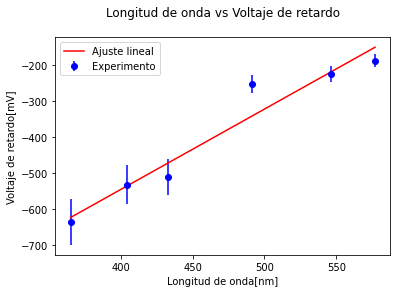

LinregressResult(slope=2.2316563347539717, intercept=-1437.8573731111974, rvalue=0.9682606623807484, pvalue=0.0014950914536813454, stderr=0.2880350031412369, intercept_stderr=136.93310475557647)


In [ ]:
  #Datos Frecuencia vs voltaje de retardo

v2=[-187.1,-225.6,-251.1,-511,-532,-636]#mV
LV(l,v2,unitx='nm',unity='mV')

          h[Js]      sd_h%          W[J]      sd_W%
0  2.333873e-34  12.673281 -9.451115e-20 -20.793984


64.8 % error para h
None


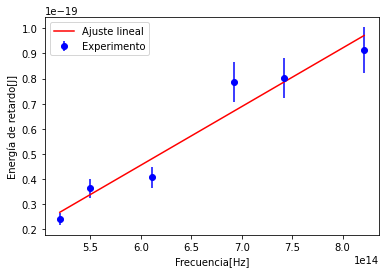

LinregressResult(slope=2.333873010706817e-34, intercept=-9.451115063909059e-20, rvalue=0.9693469017185473, pvalue=0.001395017635231789, stderr=2.957782945548152e-35, intercept_stderr=1.965263365690011e-20)


In [ ]:
v3=[-150.6,-226.3,-253.8,-491,-501,-570]
LV(l,v3)

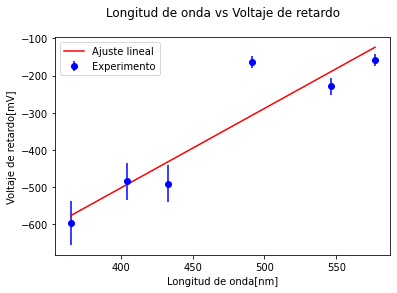

LinregressResult(slope=2.136614684230918, intercept=-1356.751158465711, rvalue=0.9230993397674425, pvalue=0.008643183155217808, stderr=0.4450549814759548, intercept_stderr=211.5810916583461)


In [ ]:
v4=[-158.3,-229.3,-164.2,-491,-485,-596]#Sin cambio de escala, se mantuvo en 10^-7*0.1
LV(l,v4,unitx='nm',unity='mV')

          h[Js]      sd_h%          W[J]    sd_W%
0  2.127632e-34  26.323125 -8.797605e-20 -42.2984


67.9 % error para h
None


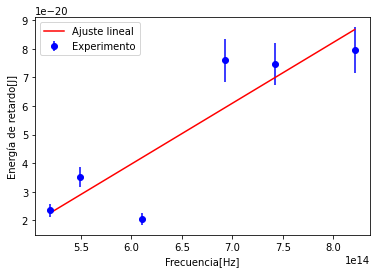

LinregressResult(slope=2.1276320559804193e-34, intercept=-8.797605412503046e-20, rvalue=0.8848647152599285, pvalue=0.019121076318908588, stderr=5.600592360670943e-35, intercept_stderr=3.721246350803518e-20)


In [ ]:
v5=[-146.5,-220.1,-127.3,-474,-466,-497]#Sin cambio de escala, se mantuvo en 10^-8*0.1
LV(l,v5)

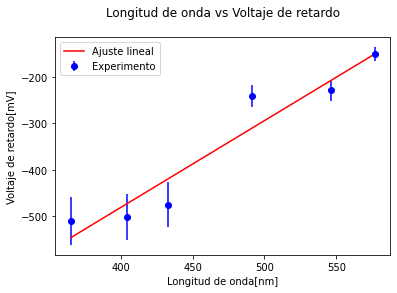

LinregressResult(slope=1.869623208058892, intercept=-1229.0098256489732, rvalue=0.9593856889708883, pvalue=0.0024407862854880966, stderr=0.2748719161353422, intercept_stderr=130.67531541668447)


In [ ]:
v6=[-151.2,-228.5,-241.5,-475,-502,-511]#Con cambios de escala en 3 a 10-8*0.1
LV(l,v6,unitx='nm',unity='mV',save=1)

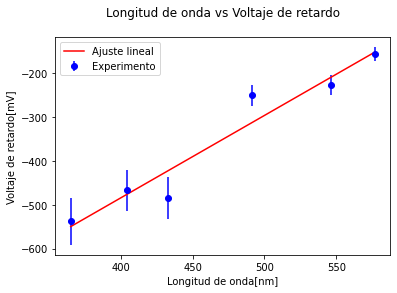

LinregressResult(slope=1.88123595505618, intercept=-1236.6267415730338, rvalue=0.9672533571433793, pvalue=0.0015909561171965998, stderr=0.24682353523489473, intercept_stderr=117.34099202480844)
          h[Js]      sd_h%          W[J]      sd_W%
0  1.901445e-34  20.311007 -6.955580e-20 -36.892354


71.3 % error para h
None


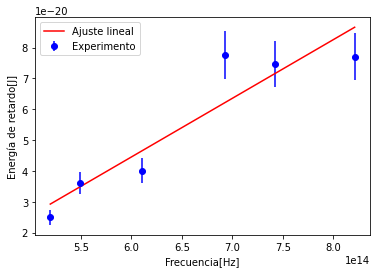

LinregressResult(slope=1.9014450657445009e-34, intercept=-6.955579810379318e-20, rvalue=0.9264762217151568, pvalue=0.007909893525716416, stderr=3.8620264559236154e-35, intercept_stderr=2.566077109402532e-20)


In [ ]:
v7=[-155.9,-225.8,-250.5,-485,-467,-538]#Replicamos el primer intento
v8=[-155.9,-225.8,-250.5,-485,-467,-481] #no cambiamos escala en el ultimo
LV(l,v7,unitx='nm',unity='mV')
LV(l,v8)

### Lunes 21

          h[Js]    sd_h%          W[J]     sd_W%
0  3.441674e-34  2.47331 -1.448432e-19 -3.904853


48.1 % error para h
None


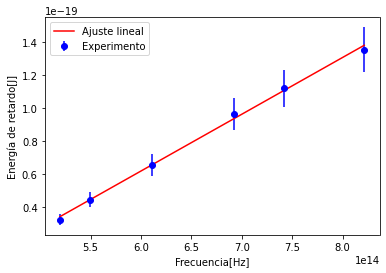

LinregressResult(slope=3.441673545674862e-34, intercept=-1.4484318569778467e-19, rvalue=0.9987787880480187, pvalue=2.2361273150002297e-06, stderr=8.512326177544566e-36, intercept_stderr=5.655912925832399e-21)


In [ ]:
v9=[-201,-276.6,-408,-601,-698,-844]
LV(l,v9,unity='J',unitx='Hz')

          h[Js]    sd_h%          W[J]     sd_W%
0  3.467022e-34  3.01401 -1.464415e-19 -4.741235


47.7 % error para h
None


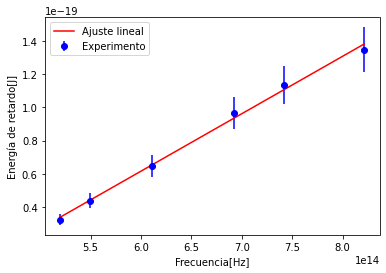

LinregressResult(slope=3.4670219635033283e-34, intercept=-1.4644152719965222e-19, rvalue=0.9981880851912925, pvalue=4.921578620904844e-06, stderr=1.0449638953811137e-35, intercept_stderr=6.94313713976954e-21)


In [ ]:
v10=[-202,-273,-403,-603,-708,-842]
LV(l,v10,unitx='Hz',unity='J')

          h[Js]    sd_h%          W[J]     sd_W%
0  3.503847e-34  2.36619 -1.488940e-19 -3.699747


47.1 % error para h
None


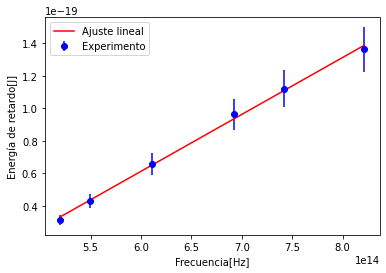

LinregressResult(slope=3.503846924635783e-34, intercept=-1.4889400751322597e-19, rvalue=0.998882106313641, pvalue=1.873830932792808e-06, stderr=8.29076751951765e-36, intercept_stderr=5.508700935639844e-21)


In [ ]:
v11=[-196.5,-269.1,-411,-602,-700,-851]
LV(l,v11,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.490137e-34  3.079048 -1.462645e-19 -4.881738


47.3 % error para h
None


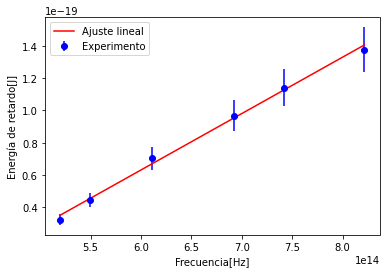

LinregressResult(slope=3.490136756927612e-34, intercept=-1.4626450104522779e-19, rvalue=0.9981092681990366, pvalue=5.358920557643931e-06, stderr=1.0746299547818476e-35, intercept_stderr=7.140249709616484e-21)


In [ ]:
v12=[-202.2,-278.2,-439,-604,-712,-859]
LV(l,v12,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.526846e-34  3.646336 -1.481112e-19 -5.769121


46.8 % error para h
None


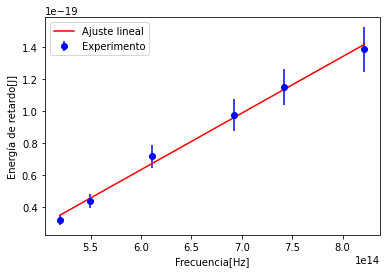

LinregressResult(slope=3.526845539435429e-34, intercept=-1.4811121605766522e-19, rvalue=0.9973514064804834, pvalue=1.0513281442590117e-05, stderr=1.2860064169839026e-35, intercept_stderr=8.54471523390421e-21)


In [ ]:
v13=[-201.7,-274.7,-448,-609,-718,-864]
LV(l,v13,unitx='Hz')

          h[Js]    sd_h%          W[J]     sd_W%
0  3.550470e-34  2.30284 -1.500211e-19 -3.621194


46.4 % error para h
None


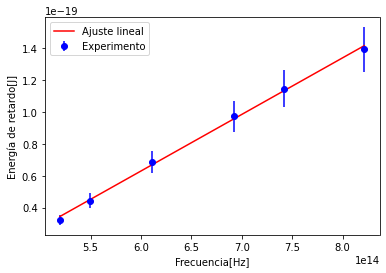

LinregressResult(slope=3.5504700539336697e-34, intercept=-1.5002107539231612e-19, rvalue=0.9989410702812203, pvalue=1.6814045180036543e-06, stderr=8.176163232727557e-36, intercept_stderr=5.432553493273055e-21)


In [ ]:
v14=[-202.3,-277.6,-430,-607,-716,-869]
LV(l,v14,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.502349e-34  3.435323 -1.468892e-19 -5.442414


47.1 % error para h
None


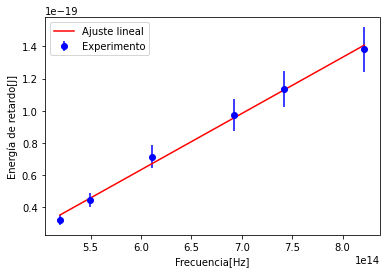

LinregressResult(slope=3.502349158994246e-34, intercept=-1.4688918916084494e-19, rvalue=0.9976480354009626, pvalue=8.291100987331525e-06, stderr=1.2031699294565887e-35, intercept_stderr=7.994318138252226e-21)


In [ ]:
v15=[-200.7,-276.3,-445,-608,-709,-862]
LV(l,v15,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.493314e-34  3.030318 -1.466385e-19 -4.796588


47.3 % error para h
None


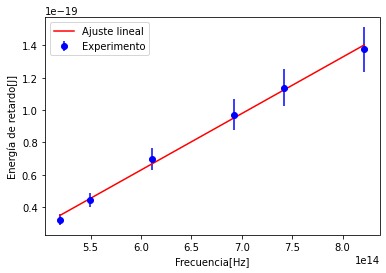

LinregressResult(slope=3.4933144890862386e-34, intercept=-1.4663846491685303e-19, rvalue=0.9981684789861152, pvalue=5.028631946015262e-06, stderr=1.058585261522922e-35, intercept_stderr=7.033642671655974e-21)


In [ ]:
v16=[-201.2,-277.0,-436,-606,-710,-858]
LV(l,v16,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.561743e-34  3.106504 -1.505120e-19 -4.884473


46.2 % error para h
None


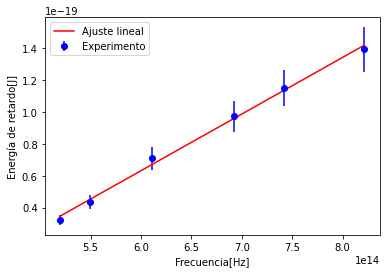

LinregressResult(slope=3.5617426955750877e-34, intercept=-1.5051203312980545e-19, rvalue=0.9980754961932832, pvalue=5.552008446387334e-06, stderr=1.1064568643542892e-35, intercept_stderr=7.351719788987898e-21)


In [ ]:
v17=[-201.8,-271.4,-443,-607,-718,-870]
LV(l,v17,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.550893e-34  3.345296 -1.496429e-19 -5.274367


46.4 % error para h
None


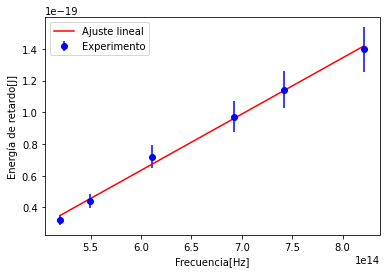

LinregressResult(slope=3.5508926264321766e-34, intercept=-1.4964290427189816e-19, rvalue=0.9977692859827275, pvalue=7.4585774289736355e-06, stderr=1.18787851530151e-35, intercept_stderr=7.89271617285513e-21)


In [ ]:
v18=[-200.9,-274.2,-449,-607,-714,-872]
LV(l,v18,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.535710e-34  3.363254 -1.488955e-19 -5.306511


46.6 % error para h
None


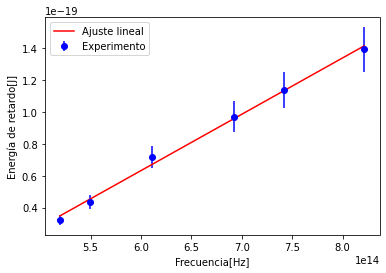

LinregressResult(slope=3.5357101239274395e-34, intercept=-1.488955256233661e-19, rvalue=0.9977453532608693, pvalue=7.619417205809807e-06, stderr=1.1891489589683624e-35, intercept_stderr=7.901157483264321e-21)


In [ ]:
v19=[-202.2,-271.6,-448,-606,-711,-869]
LV(l,v19,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.509831e-34  2.764053 -1.475160e-19 -4.369661


47.0 % error para h
None


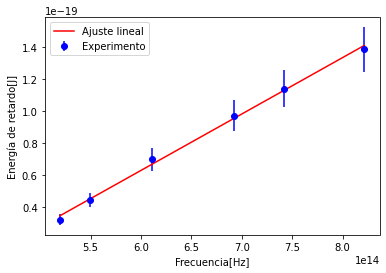

LinregressResult(slope=3.509830597641803e-34, intercept=-1.475160303338619e-19, rvalue=0.9984754956344921, pvalue=3.484398780044472e-06, stderr=9.701357279447673e-36, intercept_stderr=6.445950365446867e-21)


In [ ]:
v20=[-202.2,-277.7,-436,-606,-711,-863]
LV(l,v20,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.516871e-34  2.645789 -1.482715e-19 -4.169735


46.9 % error para h
None


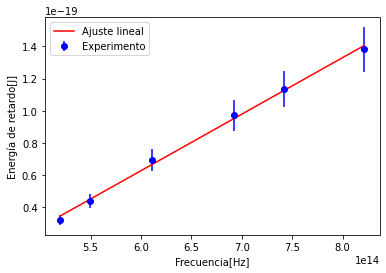

LinregressResult(slope=3.51687084877258e-34, intercept=-1.4827148441787399e-19, rvalue=0.9986028935753389, pvalue=2.926496032284613e-06, stderr=9.30489774513256e-36, intercept_stderr=6.182527587943626e-21)


In [ ]:
v21=[-201.2,-274.7,-432,-606,-709,-862]
LV(l,v21,unitx='Hz')

          h[Js]     sd_h%          W[J]    sd_W%
0  3.451114e-34  3.430802 -1.439136e-19 -5.46648


47.9 % error para h
None


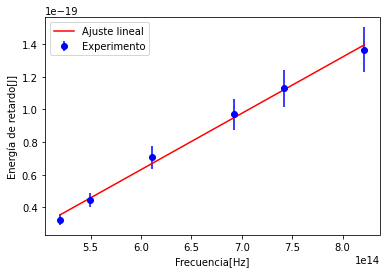

LinregressResult(slope=3.451114008782104e-34, intercept=-1.4391355006540278e-19, rvalue=0.9976541990013952, pvalue=8.247719271446439e-06, stderr=1.1840090332901749e-35, intercept_stderr=7.867005864218322e-21)


In [ ]:
v22=[-203.2,-277.4,-442,-605,-706,-853]
LV(l,v22,unitx='Hz')

          h[Js]     sd_h%          W[J]     sd_W%
0  3.502314e-34  2.946607 -1.466626e-19 -4.675332


47.1 % error para h
None


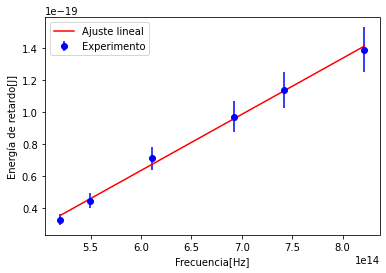

LinregressResult(slope=3.5023143366489817e-34, intercept=-1.4666260067370854e-19, rvalue=0.9982680115589877, pvalue=4.497078144128363e-06, stderr=1.0319943846041814e-35, intercept_stderr=6.856962782590321e-21)


In [ ]:
v23=[-204.7,-278.7,-444,-606,-709,-867]
LV(l,v23,unitx='Hz')

### Jueves 23

          h[Js]     sd_h%          W[J]      sd_W%
0  3.491709e-34  6.710324 -1.427894e-19 -10.902848


47.3 % error para h
None


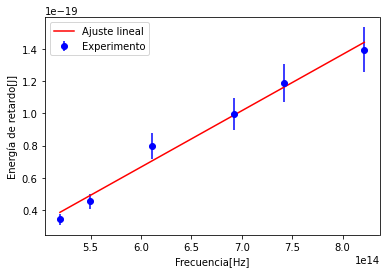

LinregressResult(slope=3.491709258873788e-34, intercept=-1.4278943616128891e-19, rvalue=0.9911141664942885, pvalue=0.00011808625165107191, stderr=2.343050030315681e-35, intercept_stderr=1.5568114609251383e-20)


In [ ]:
# escala igual a lunes 21, 10^-8x0.1
v24=[-213.9,-283.5,-499,-621,-741,-870]
LV(l,v24)

          h[Js]     sd_h%          W[J]     sd_W%
0  3.471556e-34  3.901483 -1.439057e-19 -6.253603


47.6 % error para h
None


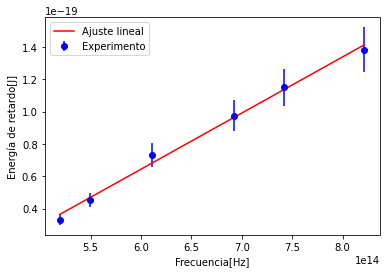

LinregressResult(slope=3.47155612797514e-34, intercept=-1.4390570954726275e-19, rvalue=0.9969695181139031, pvalue=1.3761814992164514e-05, stderr=1.354421626332888e-35, intercept_stderr=8.999291878184157e-21)


In [ ]:
v25=[-207.6,-283.5,-457,-608,-718,-863] #10^-9x1
#v25 = np.array(v25)*2
LV(l,v25)

## Sigmoide: Voltajes de saturación


0 a 10^8 y multiplicador 0.1 el voltaje de retardo fue -205.1

In [ ]:
V1=[-2.008,-1.505,-0.676,-0.413,-.3435,-0.3043,-0.2751,-0.2478,-0.2277,-0.209,-0.1917,-0.1771,-0.1636,-0.1515,-0.1403,-0.1296,-0.1194,-0.1107,-0.923,0.76,0.2573,0.394,1.864,3.98,4.77,5.04]
I1=[-7.25e-9,-7.05e-9,7e-9,6e-9,5e-9,4e-9,3e-9,2e-9,-1e-9,0,1e-9,2e-9,3e-9,4e-9,5e-9,6e-9,7e-9,8e-9,1e-8,4e-8,8e-8,10e-8,2e-7,3e-7,3.2e-7,3.4e-7]


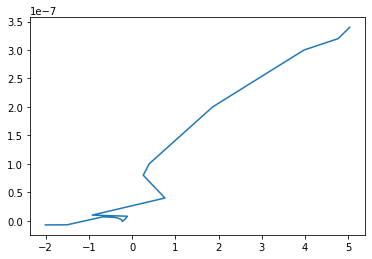

In [ ]:
plot(V1,I1)
show()

## Promedio

In [ ]:
tabla = datos(j=9,n=26,unity='J',unitx='Hz')
tabla

,Longitud[Hz],v9[J],v10[J],v11[J],v12[J],v13[J],v14[J],v15[J],v16[J],v17[J],...,v19[J],v20[J],v21[J],v22[J],v23[J],v24[J],v25[J],mean_err%,Mean(v[J]),SD[J]
0,5.195710e+14,3.220375e-20,3.236397e-20,3.148277e-20,3.239601e-20,3.231590e-20,3.241203e-20,3.215569e-20,3.223579e-20,3.233192e-20,...,3.239601e-20,3.239601e-20,3.223579e-20,3.255623e-20,3.279656e-20,3.427056e-20,3.326119e-20,1.79,3.247047e-20,5.803867e-22
1,5.490704e+14,4.431621e-20,4.373942e-20,4.311457e-20,4.457255e-20,4.401179e-20,4.447642e-20,4.426814e-20,4.438029e-20,4.348307e-20,...,4.351512e-20,4.449245e-20,4.401179e-20,4.444438e-20,4.465266e-20,4.542171e-20,4.542171e-20,1.39,4.425023e-20,6.161583e-22
2,6.105753e+14,6.536881e-20,6.456772e-20,6.584946e-20,7.033555e-20,7.177751e-20,6.889360e-20,7.129686e-20,6.985490e-20,7.097642e-20,...,7.177751e-20,6.985490e-20,6.921403e-20,7.081621e-20,7.113664e-20,7.994861e-20,7.321947e-20,4.91,7.040153e-20,3.459115e-21
3,6.923613e+14,9.629082e-20,9.661125e-20,9.645103e-20,9.677147e-20,9.757256e-20,9.725212e-20,9.741234e-20,9.709190e-20,9.725212e-20,...,9.709190e-20,9.709190e-20,9.709190e-20,9.693169e-20,9.709190e-20,9.949517e-20,9.741234e-20,0.71,9.718615e-20,6.869276e-22
4,7.420605e+14,1.118319e-19,1.134341e-19,1.121524e-19,1.140750e-19,1.150363e-19,1.147158e-19,1.135943e-19,1.137545e-19,1.150363e-19,...,1.139148e-19,1.139148e-19,1.135943e-19,1.131137e-19,1.135943e-19,1.187213e-19,1.150363e-19,1.31,1.141127e-19,1.494979e-21
5,8.213492e+14,1.352237e-19,1.349033e-19,1.363452e-19,1.376270e-19,1.384281e-19,1.392291e-19,1.381076e-19,1.374668e-19,1.393894e-19,...,1.392291e-19,1.382678e-19,1.381076e-19,1.366657e-19,1.389087e-19,1.393894e-19,1.382678e-19,1.04,1.379568e-19,1.440256e-21


          h[Js]     sd_h%          W[J]     sd_W%
0  3.503965e-34  3.077143 -1.470713e-19 -4.871176


47.1 % error para h
None


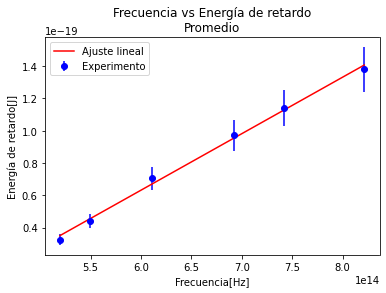

LinregressResult(slope=3.5039646504011924e-34, intercept=-1.470713200710611e-19, rvalue=0.9981116007812363, pvalue=5.345710349604463e-06, stderr=1.0782200261527957e-35, intercept_stderr=7.164103507800547e-21)


In [ ]:
 LV_prom(i=9,n=26, subtitle = 'Promedio',save = 0,savename='mitad')

          h[Js]     sd_h%          W[J]     sd_W%
0  7.007929e-34  3.077143 -2.941426e-19 -4.871176


5.8 % error para h
None


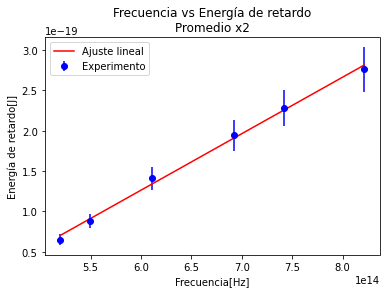

LinregressResult(slope=7.007929300802385e-34, intercept=-2.941426401421222e-19, rvalue=0.9981116007812363, pvalue=5.345710349604463e-06, stderr=2.1564400523055914e-35, intercept_stderr=1.4328207015601093e-20)


In [ ]:
LV_prom(i=9,n=26,subtitle='Promedio x2',factor_x2=1,savename='doble',save=0)